FileNotFoundError: [Errno 2] No such file or directory: './yoyo/line_plot.png'

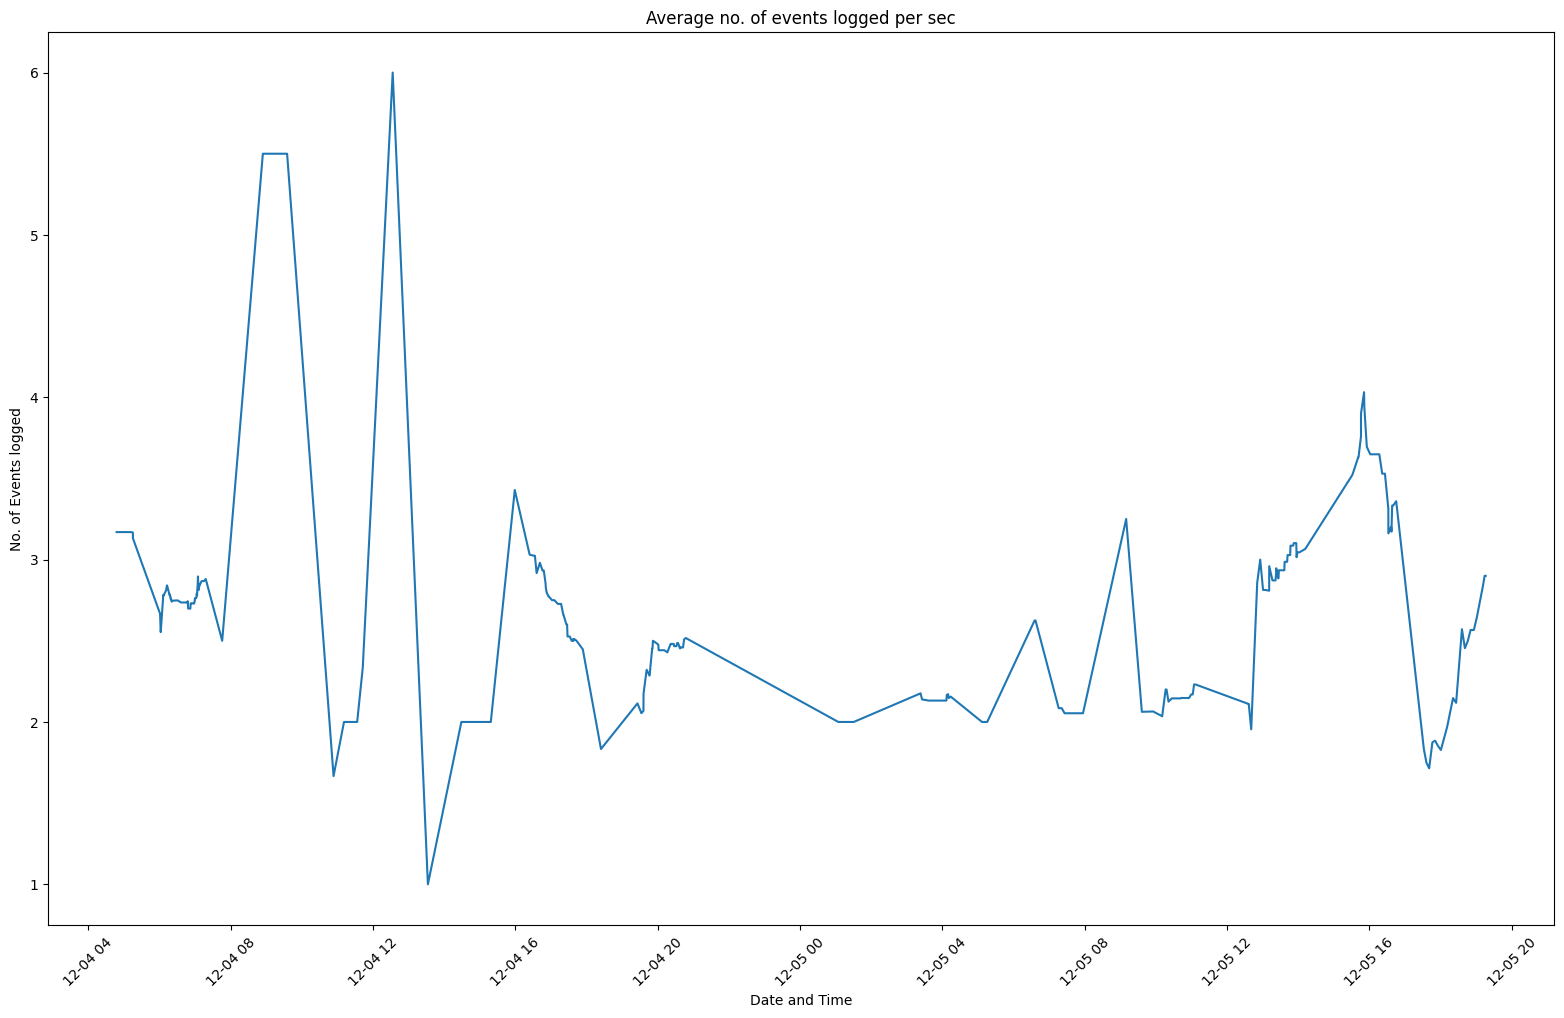

In [112]:
import numpy as np 
import matplotlib.pyplot as plt 
from sys import argv 
import os 

input_file_path = '../temp/processedUpload.log'
output_folder = './yoyo'

os.makedirs(os.path.dirname(output_folder), exist_ok=True)

def to_iso(date_str : str):
    day, month, date, time, year = date_str.split(' ')
    month_dict = {
        "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04",
        "May": "05", "Jun": "06", "Jul": "07", "Aug": "08",
        "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
    }
    return f"{year}-{month_dict[month]}-{date}T{time}"


#Read the file using numpy.
file = np.loadtxt(input_file_path, skiprows=1, delimiter=',', dtype=object)

# LINE PLOT starts here.
dates, counts = np.unique(file.T[1], return_counts=True)
dates = np.vectorize(to_iso)(dates)
datetime_dict = dict(zip(dates, counts))
datetime_dict = dict(sorted(datetime_dict.items(), key=lambda x: x[0]))

""" ROLLING MEAN APPROACH """
fraction = 0.02
noise_minimized_datetime = {}

dates = list(datetime_dict.keys())
dates = np.vectorize(np.datetime64)(dates)
total_time_frame = dates[-1] - dates[0]
window = fraction * total_time_frame

#Dates is a 1-D array. Need to convert it into 2-D.
dates = np.reshape(dates, (dates.shape[0], 1))
dates_transposed = np.reshape(dates, (1, dates.shape[0])) #For broadcasting.
mask = np.argwhere(np.abs(dates - dates_transposed) < window)
diff_matrix = dates - dates_transposed
mask = np.argwhere(np.abs(diff_matrix) < window)

#Computing the mean of all the values in the window of an element.
i_ids = mask[:,0]
j_ids = mask[:,1]
sums = np.bincount(i_ids, counts[j_ids])
i, i_counts = np.unique(i_ids, return_counts=True)
rolling_mean_average = sums / i_counts

#Plotting as line plot.
fig, ax = plt.subplots(figsize=(16,10))
ax.set_xlabel('Date and Time')
ax.set_ylabel('No. of Events logged')
plt.title('Average no. of events logged per sec')
plt.xticks(rotation=45)
plt.tight_layout()
ax.plot(dates, rolling_mean_average)
plt.savefig(output_folder + '/line_plot.png')


['E1' 'E2' 'E3' 'E4' 'E5' 'E6'] [836 569 539  32  12  12]


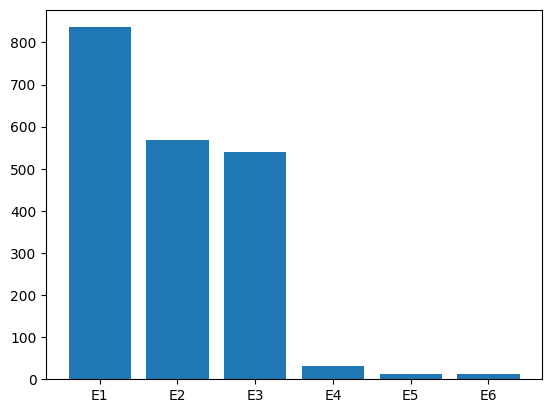

In [ ]:
""" EVENT CODE DISTRIBUTION """
event, counts = np.unique(file.T[4], return_counts=True)
print(event, counts)
plt.bar(event, counts)
plt.title('Event State Distribution')
plt.tight_layout()
plt.savefig(output_folder + 'bar_plot.png')

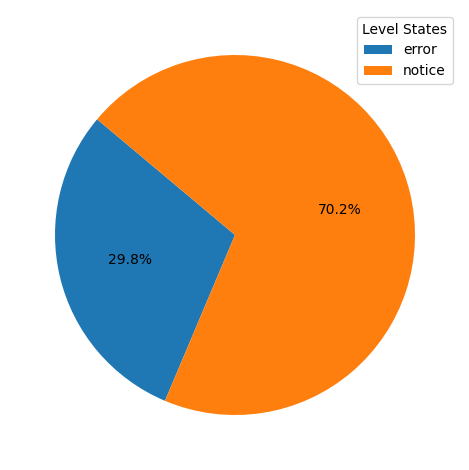

In [ ]:
"""LEVEL STATE DISTRUBUTION"""
plt.figure()
level_states, counts = np.unique(file.T[2], return_counts=True)
counts = (counts * 100) / np.sum(counts)
wedges, texts, autotexts = plt.pie(counts, labels=None,labeldistance=0.5, autopct= '%1.1f%%', startangle=140, )
plt.legend(wedges, level_states, title="Level States", loc="upper right")
plt.title('Level State Distribution')
plt.savefig(output_folder +"/pie_plot.png")